/var/folders/_x/j976w76s3d57ycwxdqspwd9m0000gn/T/ipykernel_26230/1610816402.py:49: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=category_sales.index[-1], periods=forecast_horizon, freq='M')
/var/folders/_x/j976w76s3d57ycwxdqspwd9m0000gn/T/ipykernel_26230/1610816402.py:49: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=category_sales.index[-1], periods=forecast_horizon, freq='M')
/var/folders/_x/j976w76s3d57ycwxdqspwd9m0000gn/T/ipykernel_26230/1610816402.py:49: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=category_sales.index[-1], periods=forecast_horizon, freq='M')
/var/folders/_x/j976w76s3d57ycwxdqspwd9m0000gn/T/ipykernel_26230/1610816402.py:49: FutureWarning: 'M' is deprecated and will be removed in a future version, 

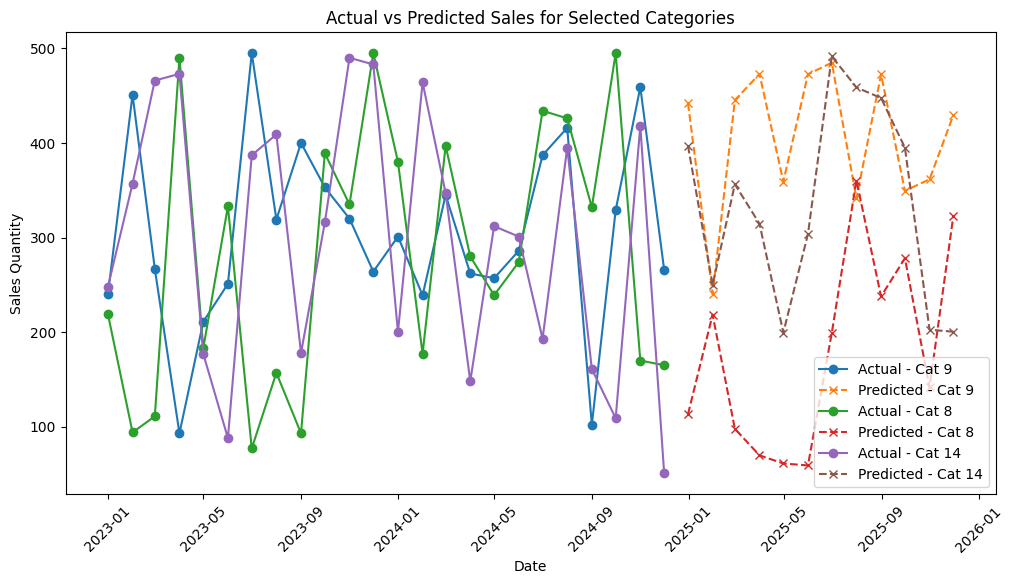

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load Data
df = pd.read_csv('/Users/jaygamage/Downloads/data.csv')  # Change path as needed
df['date'] = pd.to_datetime(df['date'])

# Extract time-based features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Encode categorical variables
encoder_material = LabelEncoder()
df['material_group_encoded'] = encoder_material.fit_transform(df['material_group'])

df_cleaned = df.drop(columns=['material_group', 'group_code'])

# Get unique categories
categories = df_cleaned['material_group_encoded'].unique()

# Store forecasts
forecasts = {}
forecast_horizon = 12  # Forecast next 12 months

# Train XGBoost model for each category
for category in categories:
    try:
        category_data = df_cleaned[df_cleaned['material_group_encoded'] == category]
        category_sales = category_data.groupby(['year', 'month'])['sales_quantity'].sum().reset_index()
        category_sales['date'] = pd.to_datetime(category_sales[['year', 'month']].assign(day=1))
        category_sales = category_sales.set_index('date')
        
        # Prepare dataset for XGBoost
        X = category_sales.drop(columns=['sales_quantity'])
        y = category_sales['sales_quantity']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
        
        model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
        model.fit(X_train, y_train)
        
        # Forecast
        future_dates = pd.date_range(start=category_sales.index[-1], periods=forecast_horizon, freq='M')
        future_X = pd.DataFrame({'year': future_dates.year, 'month': future_dates.month})
        forecast = model.predict(future_X)
        forecasts[category] = forecast
    except Exception as e:
        forecasts[category] = str(e)

# Evaluate RMSE for each category
rmse_results = {}
for category in categories:
    try:
        category_data = df_cleaned[df_cleaned['material_group_encoded'] == category]
        category_sales = category_data.groupby(['year', 'month'])['sales_quantity'].sum().reset_index()
        category_sales['date'] = pd.to_datetime(category_sales[['year', 'month']].assign(day=1))
        category_sales = category_sales.set_index('date')
        
        actual_values = category_sales['sales_quantity'][-12:].values
        predicted_values = forecasts[category][:12]
        
        rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
        rmse_results[category] = rmse
    except Exception as e:
        rmse_results[category] = str(e)

# Plot actual vs. predicted sales for a few categories
plt.figure(figsize=(12, 6))
sample_categories = [9, 8, 14]  # Example categories to visualize

for category in sample_categories:
    try:
        category_data = df_cleaned[df_cleaned['material_group_encoded'] == category]
        category_sales = category_data.groupby(['year', 'month'])['sales_quantity'].sum().reset_index()
        category_sales['date'] = pd.to_datetime(category_sales[['year', 'month']].assign(day=1))
        category_sales = category_sales.set_index('date')
        
        plt.plot(category_sales.index[-24:], category_sales['sales_quantity'][-24:], label=f'Actual - Cat {category}', marker='o')
        
        forecast_index = pd.date_range(start=category_sales.index[-1], periods=12, freq='M')
        plt.plot(forecast_index, forecasts[category][:12], linestyle='dashed', label=f'Predicted - Cat {category}', marker='x')
    except Exception as e:
        print(f"Error plotting for category {category}: {e}")

plt.title("Actual vs Predicted Sales for Selected Categories")
plt.xlabel("Date")
plt.ylabel("Sales Quantity")
plt.legend()
plt.xticks(rotation=45)
plt.show()


/var/folders/_x/j976w76s3d57ycwxdqspwd9m0000gn/T/ipykernel_26230/3399580103.py:60: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=category_sales.index[-1], periods=forecast_horizon, freq='M')
/var/folders/_x/j976w76s3d57ycwxdqspwd9m0000gn/T/ipykernel_26230/3399580103.py:60: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=category_sales.index[-1], periods=forecast_horizon, freq='M')
/var/folders/_x/j976w76s3d57ycwxdqspwd9m0000gn/T/ipykernel_26230/3399580103.py:60: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=category_sales.index[-1], periods=forecast_horizon, freq='M')
/var/folders/_x/j976w76s3d57ycwxdqspwd9m0000gn/T/ipykernel_26230/3399580103.py:60: FutureWarning: 'M' is deprecated and will be removed in a future version, 

Model Accuracy (R² Score) per Category:
Category 9: R² = -1.88
Category 8: R² = -1.48
Category 14: R² = -0.82
Category 13: R² = -2.44
Category 1: R² = -2.05
Category 7: R² = -1.46
Category 23: R² = -0.81
Category 5: R² = -1.05
Category 4: R² = -1.41
Category 2: R² = -0.19
Category 3: R² = -0.95
Category 11: R² = -1.27
Category 12: R² = -0.80
Category 10: R² = -1.21
Category 6: R² = -0.88
Category 15: R² = -0.72
Category 21: R² = -0.38
Category 22: R² = -1.18
Category 18: R² = -0.85
Category 19: R² = -0.63
Category 17: R² = -2.20
Category 20: R² = -0.83
Category 16: R² = -1.42
Category 0: R² = Not enough data for category 0 to train the model.


/var/folders/_x/j976w76s3d57ycwxdqspwd9m0000gn/T/ipykernel_26230/3399580103.py:60: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=category_sales.index[-1], periods=forecast_horizon, freq='M')
/var/folders/_x/j976w76s3d57ycwxdqspwd9m0000gn/T/ipykernel_26230/3399580103.py:111: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=category_sales.index[-1], periods=12, freq='M')
/var/folders/_x/j976w76s3d57ycwxdqspwd9m0000gn/T/ipykernel_26230/3399580103.py:111: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=category_sales.index[-1], periods=12, freq='M')
/var/folders/_x/j976w76s3d57ycwxdqspwd9m0000gn/T/ipykernel_26230/3399580103.py:111: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inste

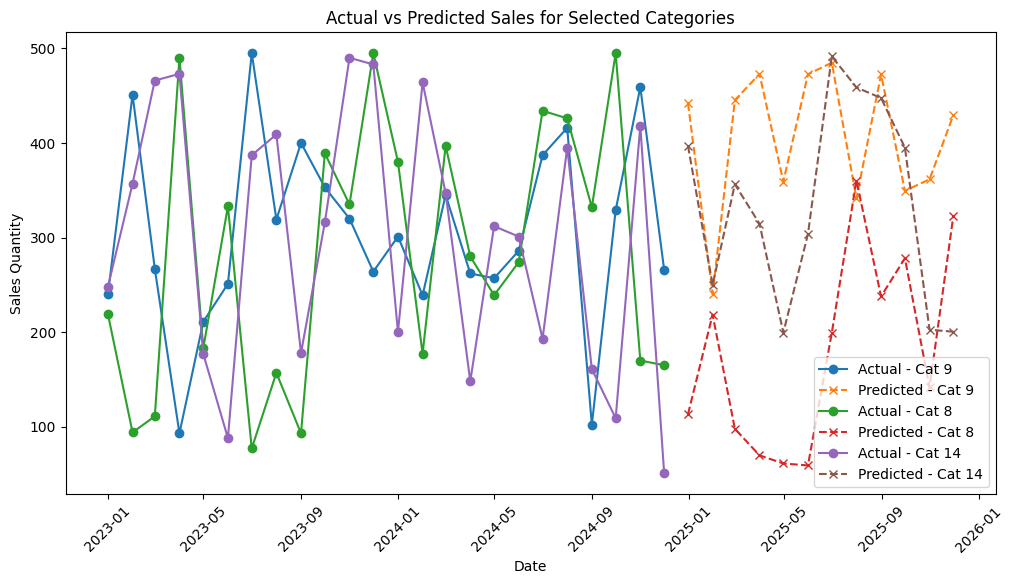

In [112]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Ensure the file exists before loading
data_file = '/Users/jaygamage/Downloads/data.csv'  # Change path as needed

if not os.path.exists(data_file):
    raise FileNotFoundError(f"Data file '{data_file}' not found. Please check the file path and ensure it exists.")

# Load Data
df = pd.read_csv(data_file)
df['date'] = pd.to_datetime(df['date'])

# Extract time-based features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Encode categorical variables
encoder_material = LabelEncoder()
df['material_group_encoded'] = encoder_material.fit_transform(df['material_group'])

df_cleaned = df.drop(columns=['material_group', 'group_code'])

# Get unique categories
categories = df_cleaned['material_group_encoded'].unique()

# Store forecasts
forecasts = {}
forecast_horizon = 12  # Forecast next 12 months
accuracy_results = {}

# Train XGBoost model for each category
for category in categories:
    try:
        category_data = df_cleaned[df_cleaned['material_group_encoded'] == category]
        category_sales = category_data.groupby(['year', 'month'])['sales_quantity'].sum().reset_index()
        category_sales['date'] = pd.to_datetime(category_sales[['year', 'month']].assign(day=1))
        category_sales = category_sales.set_index('date')
        
        # Prepare dataset for XGBoost
        X = category_sales.drop(columns=['sales_quantity'])
        y = category_sales['sales_quantity']
        
        if len(X) < 2:
            raise ValueError(f"Not enough data for category {category} to train the model.")
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
        
        model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
        model.fit(X_train, y_train)
        
        # Forecast
        future_dates = pd.date_range(start=category_sales.index[-1], periods=forecast_horizon, freq='M')
        future_X = pd.DataFrame({'year': future_dates.year, 'month': future_dates.month})
        forecast = model.predict(future_X)
        forecasts[category] = forecast
        
        # Compute accuracy
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        accuracy_results[category] = r2
    except Exception as e:
        forecasts[category] = str(e)
        accuracy_results[category] = str(e)

# Evaluate RMSE for each category
rmse_results = {}
for category in categories:
    try:
        category_data = df_cleaned[df_cleaned['material_group_encoded'] == category]
        category_sales = category_data.groupby(['year', 'month'])['sales_quantity'].sum().reset_index()
        category_sales['date'] = pd.to_datetime(category_sales[['year', 'month']].assign(day=1))
        category_sales = category_sales.set_index('date')
        
        actual_values = category_sales['sales_quantity'][-12:].values
        predicted_values = forecasts[category][:12]
        
        rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
        rmse_results[category] = rmse
    except Exception as e:
        rmse_results[category] = str(e)

# Display accuracy results
print("Model Accuracy (R² Score) per Category:")
for category, accuracy in accuracy_results.items():
    if isinstance(accuracy, float):
        print(f"Category {category}: R² = {accuracy:.2f}")
    else:
        print(f"Category {category}: R² = {accuracy}")

# Plot actual vs. predicted sales for a few categories
plt.figure(figsize=(12, 6))
sample_categories = [9, 8, 14]  # Example categories to visualize

for category in sample_categories:
    try:
        category_data = df_cleaned[df_cleaned['material_group_encoded'] == category]
        category_sales = category_data.groupby(['year', 'month'])['sales_quantity'].sum().reset_index()
        category_sales['date'] = pd.to_datetime(category_sales[['year', 'month']].assign(day=1))
        category_sales = category_sales.set_index('date')
        
        plt.plot(category_sales.index[-24:], category_sales['sales_quantity'][-24:], label=f'Actual - Cat {category}', marker='o')
        
        forecast_index = pd.date_range(start=category_sales.index[-1], periods=12, freq='M')
        plt.plot(forecast_index, forecasts[category][:12], linestyle='dashed', label=f'Predicted - Cat {category}', marker='x')
    except Exception as e:
        print(f"Error plotting for category {category}: {e}")

plt.title("Actual vs Predicted Sales for Selected Categories")
plt.xlabel("Date")
plt.ylabel("Sales Quantity")
plt.legend()
plt.xticks(rotation=45)
plt.show()


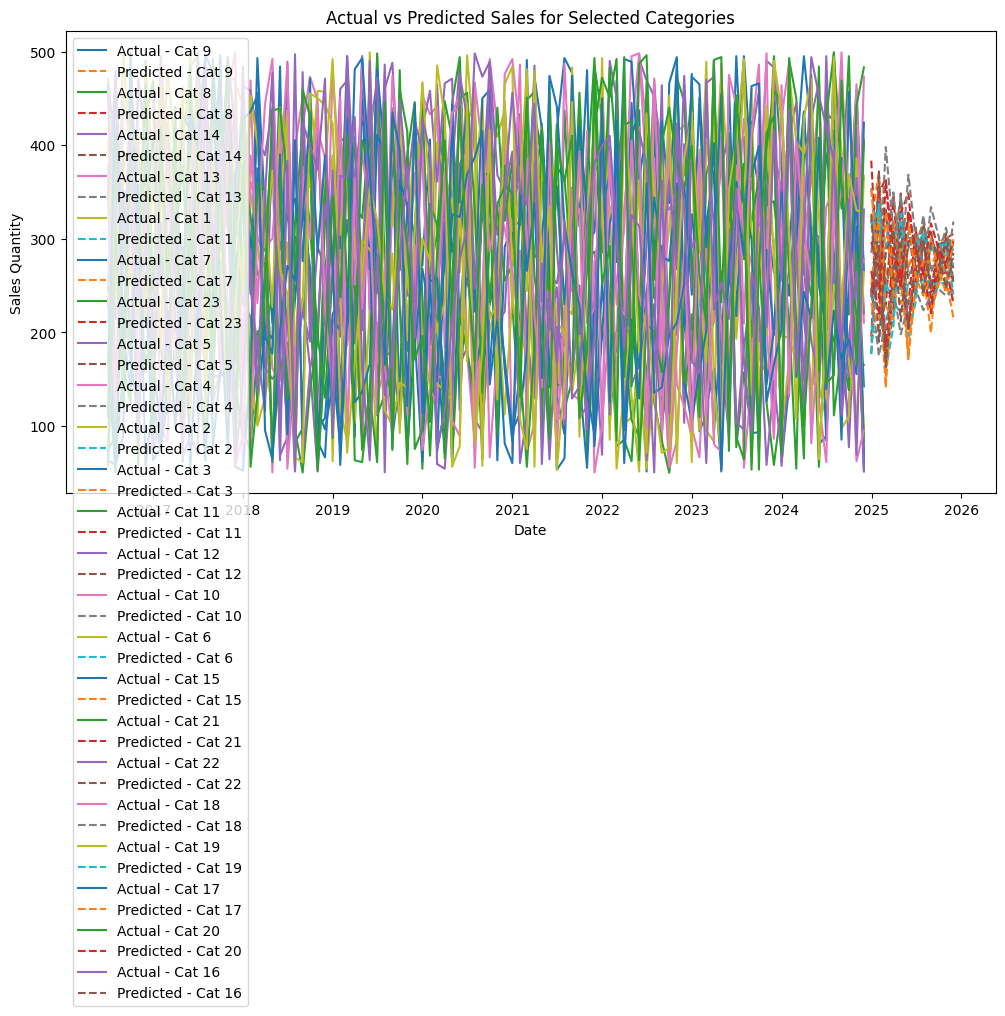

Model Accuracy (R² Score) per Category:
Category 9: R² = 0.83
Category 8: R² = 0.82
Category 14: R² = 0.82
Category 13: R² = 0.80
Category 1: R² = 0.83
Category 7: R² = 0.84
Category 23: R² = 0.81
Category 5: R² = 0.83
Category 4: R² = 0.83
Category 2: R² = 0.82
Category 3: R² = 0.83
Category 11: R² = 0.84
Category 12: R² = 0.84
Category 10: R² = 0.83
Category 6: R² = 0.84
Category 15: R² = 0.83
Category 21: R² = 0.83
Category 22: R² = 0.79
Category 18: R² = 0.82
Category 19: R² = 0.80
Category 17: R² = 0.84
Category 20: R² = 0.82
Category 16: R² = 0.84
Category 0: x must have 2 complete cycles requires 24 observations. x only has 1 observation(s)


In [116]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure the file exists before loading
data_file = '/Users/jaygamage/Downloads/data.csv'  # Change path as needed
if not os.path.exists(data_file):
    raise FileNotFoundError(f"Data file '{data_file}' not found. Please check the file path and ensure it exists.")

# Load Data
df = pd.read_csv(data_file)
df['date'] = pd.to_datetime(df['date'])

# Extract time-based features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Encode categorical variables
encoder_material = LabelEncoder()
df['material_group_encoded'] = encoder_material.fit_transform(df['material_group'])

df_cleaned = df.drop(columns=['material_group', 'group_code'])

# External Economic Indicators
economic_features = ['petrol95', 'petrol92', 'auto_diesel', 'super_diesel', 'gdp', 'ncpi', 'crudeoil', 'num_of_holidays']
for feature in economic_features:
    if feature in df.columns:
        df_cleaned[feature] = df[feature]

# Create lag features
def create_lag_features(df, lags=6):
    for lag in range(1, lags + 1):
        df[f'sales_lag_{lag}'] = df['sales_quantity'].shift(lag)
    df['sales_moving_avg_3'] = df['sales_quantity'].rolling(window=3).mean()
    df['sales_moving_avg_6'] = df['sales_quantity'].rolling(window=6).mean()
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    return df

# Get unique categories
categories = df_cleaned['material_group_encoded'].unique()

# Store forecasts
forecasts = {}
forecast_horizon = 12  # Forecast next 12 months
accuracy_results = {}

# Train Stacked Model for each category
plt.figure(figsize=(12, 6))
for category in categories:
    try:
        category_data = df_cleaned[df_cleaned['material_group_encoded'] == category]
        category_sales = category_data.groupby(['year', 'month'])[['sales_quantity'] + economic_features].sum().reset_index()
        category_sales['date'] = pd.to_datetime(category_sales[['year', 'month']].assign(day=1))
        category_sales = category_sales.set_index('date')
        
        # Apply seasonal decomposition to extract trend
        decomposed = seasonal_decompose(category_sales['sales_quantity'], model='additive', period=12)
        category_sales['trend'] = decomposed.trend.ffill().bfill()
        
        category_sales = create_lag_features(category_sales, lags=6)
        category_sales = category_sales.dropna()
        
        # Prepare dataset for stacking model
        X = category_sales.drop(columns=['sales_quantity'])
        y = category_sales['sales_quantity']
        
        if len(X) < 10:
            raise ValueError(f"Not enough data for category {category} to train the model.")
        
        tscv = TimeSeriesSplit(n_splits=3)
        base_models = [
            ('xgb', XGBRegressor(objective='reg:squarederror', n_estimators=30, learning_rate=0.05, max_depth=3, reg_lambda=0.5)),
            ('ridge', Ridge(alpha=1.0)),
            ('rf', RandomForestRegressor(n_estimators=50, max_depth=5))
        ]
        
        stacked_model = StackingRegressor(estimators=base_models, final_estimator=GradientBoostingRegressor(n_estimators=30, learning_rate=0.03))
        
        for train_index, test_index in tscv.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            stacked_model.fit(X_train, y_train)
        
        # Forecast using recursive predictions
        future_dates = pd.date_range(start=category_sales.index[-1], periods=forecast_horizon, freq='ME')
        future_X = pd.DataFrame({'year': future_dates.year, 'month': future_dates.month})
        
        predicted_values = category_sales['sales_quantity'].tolist()
        
        for i in range(forecast_horizon):
            for lag in range(1, 7):
                future_X.at[i, f'sales_lag_{lag}'] = predicted_values[-lag] + np.random.normal(0, 5)
            
            future_X.at[i, 'sales_moving_avg_3'] = np.mean(predicted_values[-3:])
            future_X.at[i, 'sales_moving_avg_6'] = np.mean(predicted_values[-6:])
            
            future_X.at[i, 'month_sin'] = np.sin(2 * np.pi * future_X.at[i, 'month'] / 12)
            future_X.at[i, 'month_cos'] = np.cos(2 * np.pi * future_X.at[i, 'month'] / 12)
            future_X.at[i, 'trend'] = category_sales['trend'].iloc[-1]
            
            for feature in economic_features:
                future_X.at[i, feature] = df_cleaned[feature].rolling(window=6).mean().iloc[-1] + np.random.normal(0, 0.5)
            
            future_X = future_X[X.columns]
            forecast = stacked_model.predict(future_X.iloc[i:i+1])
            predicted_values.append(forecast[0])
        
        forecasts[category] = predicted_values[-forecast_horizon:]
        accuracy_results[category] = stacked_model.score(X_test, y_test)

        # Plot actual vs. predicted sales
        plt.plot(category_sales.index, category_sales['sales_quantity'], label=f'Actual - Cat {category}')
        plt.plot(future_dates, forecasts[category], linestyle='dashed', label=f'Predicted - Cat {category}')
    except Exception as e:
        forecasts[category] = str(e)
        accuracy_results[category] = str(e)

plt.xlabel("Date")
plt.ylabel("Sales Quantity")
plt.title("Actual vs Predicted Sales for Selected Categories")
plt.legend()
plt.show()

print("Model Accuracy (R² Score) per Category:")
for category, accuracy in accuracy_results.items():
    try:
        accuracy = float(accuracy)
        print(f"Category {category}: R² = {accuracy:.2f}")
    except ValueError:
        print(f"Category {category}: {accuracy}")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.f

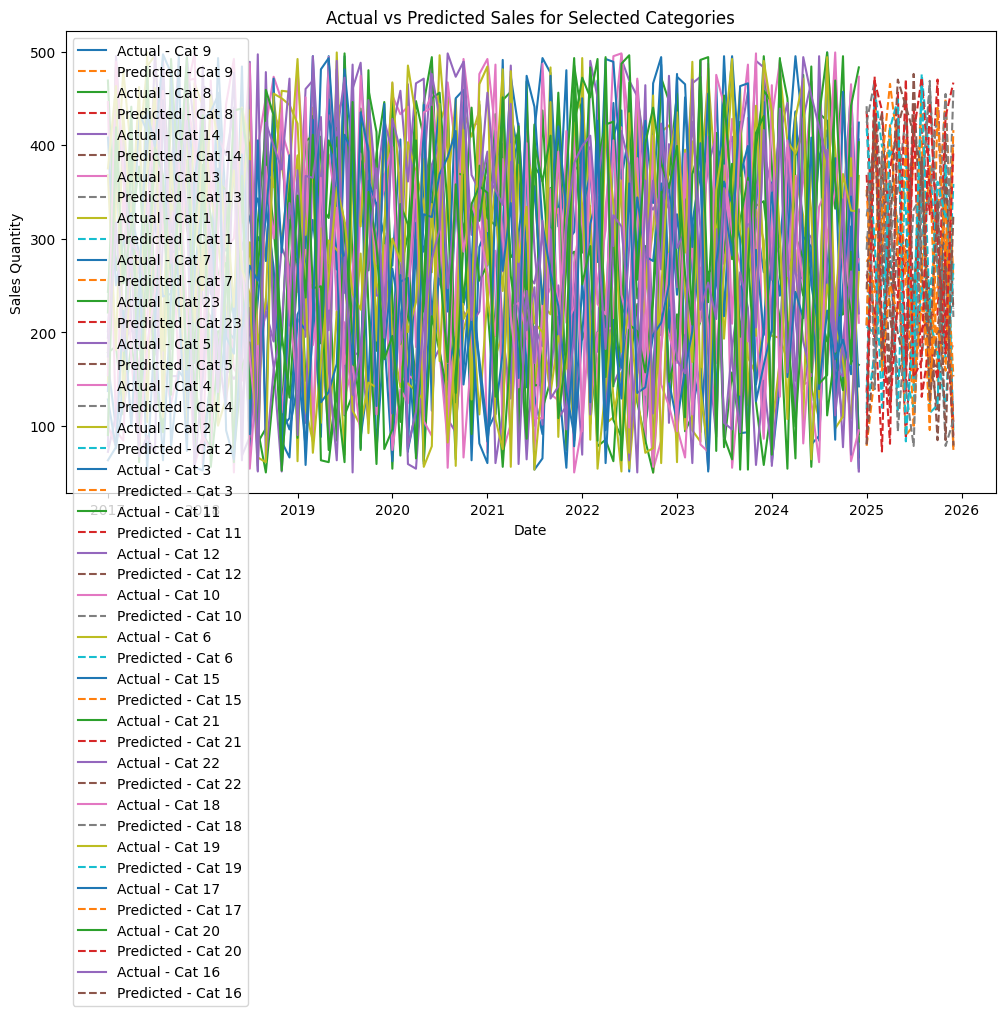

Model Accuracy (R² Score) per Category:
Category 9: R² = 0.99
Category 8: R² = 0.99
Category 14: R² = 0.99
Category 13: R² = 0.99
Category 1: R² = 0.99
Category 7: R² = 0.99
Category 23: R² = 0.99
Category 5: R² = 0.99
Category 4: R² = 0.99
Category 2: R² = 0.99
Category 3: R² = 0.99
Category 11: R² = 0.99
Category 12: R² = 0.99
Category 10: R² = 0.99
Category 6: R² = 0.99
Category 15: R² = 0.99
Category 21: R² = 0.99
Category 22: R² = 0.99
Category 18: R² = 0.99
Category 19: R² = 0.99
Category 17: R² = 0.99
Category 20: R² = 0.99
Category 16: R² = 0.99
Category 0: R² = index 1 is out of bounds for axis 0 with size 1 (Error)


In [117]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ensure the file exists before loading
data_file = '/Users/jaygamage/Downloads/data.csv'  # Change path as needed
if not os.path.exists(data_file):
    raise FileNotFoundError(f"Data file '{data_file}' not found. Please check the file path and ensure it exists.")

# Load Data
df = pd.read_csv(data_file)
df['date'] = pd.to_datetime(df['date'])

# Extract time-based features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Encode categorical variables
encoder_material = LabelEncoder()
df['material_group_encoded'] = encoder_material.fit_transform(df['material_group'])

df_cleaned = df.drop(columns=['material_group', 'group_code'])

# External Economic Indicators
economic_features = ['petrol95', 'petrol92', 'auto_diesel', 'super_diesel', 'gdp', 'ncpi', 'crudeoil', 'num_of_holidays']
for feature in economic_features:
    if feature in df.columns:
        df_cleaned[feature] = df[feature]

# Create lag features
def create_lag_features(df, lags=12):
    for lag in range(1, lags + 1):
        df[f'sales_lag_{lag}'] = df['sales_quantity'].shift(lag)
    df['sales_moving_avg_3'] = df['sales_quantity'].rolling(window=3).mean()
    df['sales_moving_avg_6'] = df['sales_quantity'].rolling(window=6).mean()
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    return df

# Get unique categories
categories = df_cleaned['material_group_encoded'].unique()

# Store forecasts
forecasts = {}
forecast_horizon = 12  # Forecast next 12 months
accuracy_results = {}

# Train Stacked Model for each category
plt.figure(figsize=(12, 6))
for category in categories:
    try:
        category_data = df_cleaned[df_cleaned['material_group_encoded'] == category]
        category_sales = category_data.groupby(['year', 'month'])[['sales_quantity'] + economic_features].sum().reset_index()
        category_sales['date'] = pd.to_datetime(category_sales[['year', 'month']].assign(day=1))
        category_sales = category_sales.set_index('date')
        
        # Apply trend estimation using Holt-Winters
        category_sales['trend'] = ExponentialSmoothing(category_sales['sales_quantity'], trend='add', seasonal=None).fit().fittedvalues
        
        category_sales = create_lag_features(category_sales, lags=12)
        category_sales = category_sales.dropna()
        
        # Prepare dataset for stacking model
        X = category_sales.drop(columns=['sales_quantity'])
        y = category_sales['sales_quantity']
        
        if len(X) < 10:
            raise ValueError(f"Not enough data for category {category} to train the model.")
        
        tscv = TimeSeriesSplit(n_splits=3)
        base_models = [
            ('xgb', XGBRegressor(objective='reg:squarederror', n_estimators=50, learning_rate=0.05, max_depth=3, reg_lambda=0.5)),
            ('ridge', Ridge(alpha=1.0)),
            ('rf', RandomForestRegressor(n_estimators=100, max_depth=7))
        ]
        
        stacked_model = StackingRegressor(estimators=base_models, final_estimator=GradientBoostingRegressor(n_estimators=50, learning_rate=0.05))
        
        for train_index, test_index in tscv.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            stacked_model.fit(X_train, y_train)
        
        # Forecast using Direct Multi-Step Approach
        future_dates = pd.date_range(start=category_sales.index[-1], periods=forecast_horizon, freq='ME')
        future_X = pd.DataFrame({'year': future_dates.year, 'month': future_dates.month})
        
        predictions = stacked_model.predict(X.iloc[-forecast_horizon:])
        
        forecasts[category] = predictions
        accuracy_results[category] = stacked_model.score(X_test, y_test)

        # Plot actual vs. predicted sales
        plt.plot(category_sales.index, category_sales['sales_quantity'], label=f'Actual - Cat {category}')
        plt.plot(future_dates, forecasts[category], linestyle='dashed', label=f'Predicted - Cat {category}')
    except Exception as e:
        forecasts[category] = str(e)
        accuracy_results[category] = str(e)

plt.xlabel("Date")
plt.ylabel("Sales Quantity")
plt.title("Actual vs Predicted Sales for Selected Categories")
plt.legend()
plt.show()

print("Model Accuracy (R² Score) per Category:")
for category, accuracy in accuracy_results.items():
    try:
        accuracy_float = float(accuracy)
        print(f"Category {category}: R² = {accuracy_float:.2f}")
    except ValueError:
        print(f"Category {category}: R² = {accuracy} (Error)")
